<a href="https://colab.research.google.com/github/brandon-baek/Student-Depression-EDA-Prediction/blob/main/Student_Depression_EDA_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Depression EDA & Prediction

This project aims to model the depression probability of a student depending on several life factors. This project not only aims to create a tool for people to understand the mental wellbeing of students, but also to raise awareness on Mental Health importance. It is also a learning experience for my Data Science and Machine Learning skills.

Hypothesis:
Factors directly related to academic and personal stress, such as high Academic Pressure, low Sleep Duration, extensive Work/Study Hours, and significant Financial Stress, are strong predictors of a higher probability of depression among students.

**Made by Brandon Baek**

# Prerequisites

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Exploration

## Installation and Preparation

[Student Depression Dataset by Adil Shamim on Kaggle](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset)

This dataset features multiple factors that could contribute to a student's depression.

In [ ]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/student-depression-dataset",
  "student_depression_dataset.csv",
)
clear_output()

df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


For the purposes of this project, the following columns will be utilized:
1. Gender
2. Age
3. Academic Pressure
4. CGPA
5. Study Satisfaction
6. Sleep Duration
7. Work/Study Hours
8. Financial Stress
9. Family History of Mental Illness
10. Depression

These decisions are not final, after conducting an analysis on the correlation each column has to depression, the choices may change.

(Due to the length of the "Family History of Mental Illness" column, it is renamed to just "Family History")

In [ ]:
df = df[['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']]

df.rename(columns={'Family History of Mental Illness': 'Family History'}, inplace=True)
clear_output()

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Family History,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',1.0,1.0,No,0


In [ ]:
df.replace('?', np.nan, inplace=True)

All mentions of "?" (Within Financial Stress) are changed to NaN.

In [ ]:
df.drop_duplicates(inplace=True)

All duplicates within the dataset are dropped.

In [ ]:
df.dropna(inplace=True)

Simple method to detect if there are any non-existent values within the dataset.

In this case, none are non-existent values.

### Text-to-Numerical Conversion

Due to the textual nature of the Sleep Duration, Gender, and Family History columns, they must be converted into numerical values first.

First, the unique strings within the columns are gathered.

In [ ]:
print(df['Sleep Duration'].unique())
print(df['Gender'].unique())
print(df['Family History'].unique())

["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
['Male' 'Female']
['No' 'Yes']


In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].map({"'5-6 hours'": 5.5, "'Less than 5 hours'": 4, "'7-8 hours'": 7.5, "'More than 8 hours'": 9, 'Others': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Family History'] = df['Family History'].map({'No': 0, 'Yes': 1})

df[['Sleep Duration', 'Gender', 'Family History']]

,Sleep Duration,Gender,Family History
0,5.5,0,0
1,5.5,1,1
2,4.0,0,1
3,7.5,1,1
4,5.5,1,0
...,...,...,...
27896,5.5,1,1
27897,4.0,0,1
27898,5.5,0,0
27899,4.0,1,0


## Data Exploration

### Analysis and Limitations

In [ ]:
df.describe()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Work/Study Hours,Family History,Depression
count,27894.000000,27894.000000,27894.000000,27894.000000,27894.000000,27894.000000,27894.000000,27894.000000,27894.000000
mean,0.442783,25.821539,3.141357,7.656087,2.943931,6.334642,7.156163,0.483939,0.585574
std,0.496724,4.905443,1.381431,1.470664,1.361178,1.923654,3.707669,0.499751,0.492632
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,2.000000,6.290000,2.000000,4.000000,4.000000,0.000000,0.000000
50%,0.000000,25.000000,3.000000,7.770000,3.000000,5.500000,8.000000,0.000000,1.000000
75%,1.000000,30.000000,4.000000,8.920000,4.000000,7.500000,10.000000,1.000000,1.000000
max,1.000000,59.000000,5.000000,10.000000,5.000000,9.000000,12.000000,1.000000,1.000000


The description of the dataset highlight several potential biases and limitations. The dataset is heavily skewed towards younger adults, with 75% of participants aged 30 or younger (median age 25) and a maximum age of 59, limiting generalizability to older populations. The Age column actually exhibits a slight positive skew (mean 25.8 > median 25.0), indicating a tail towards the few older individuals rather than a concentration of smaller values as initially stated. The binary encoding for Gender, Family History, and Depression simplifies complex attributes and excludes non-binary gender identities. The high mean for Depression (~0.59) suggests nearly 59% of the sample might be categorized as depressed, which could indicate sampling bias (e.g., surveying a population seeking mental health support) rather than reflecting the general population. Furthermore, the ranges for variables like Sleep Duration (max 4) and Work/Study Hours (max 12) seem constrained or possibly categorical, potentially limiting the nuance captured.

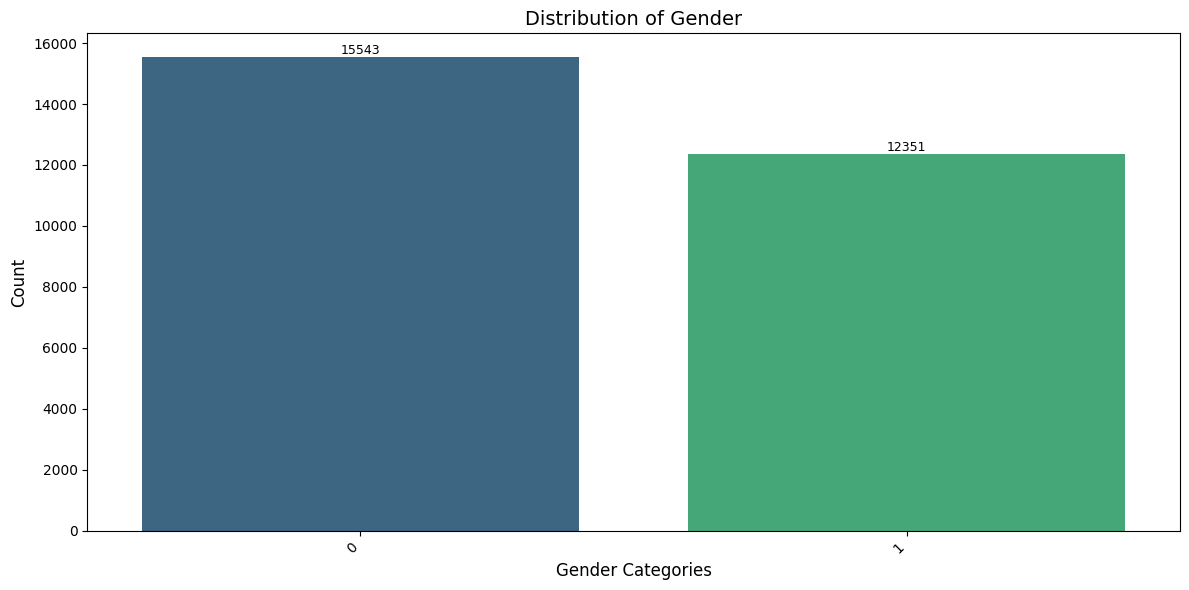

------------------------------


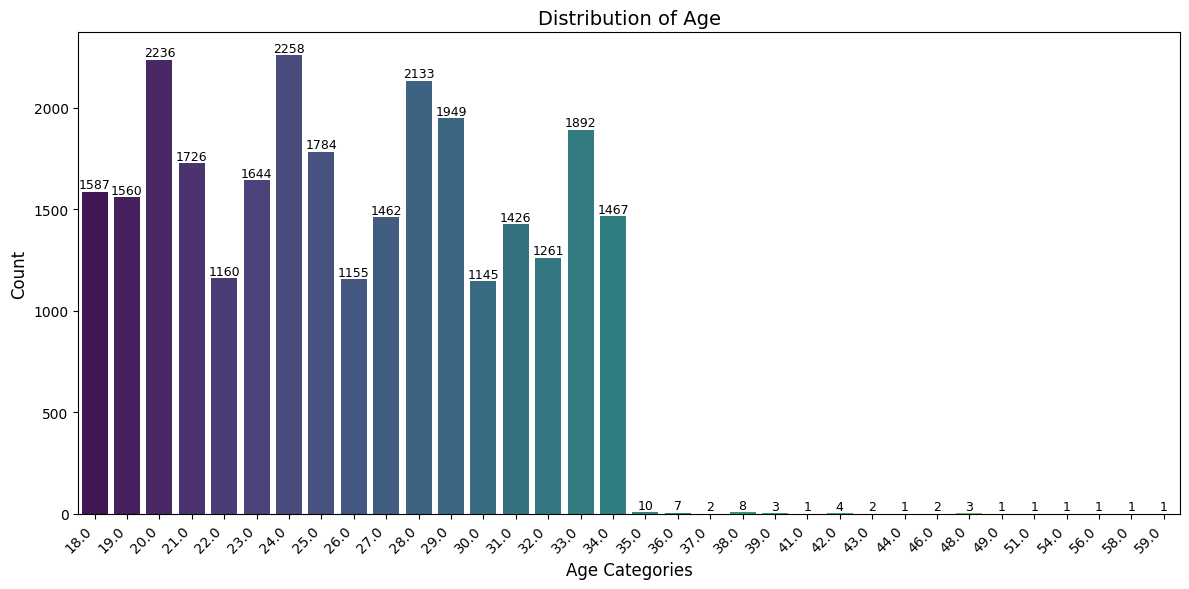

------------------------------


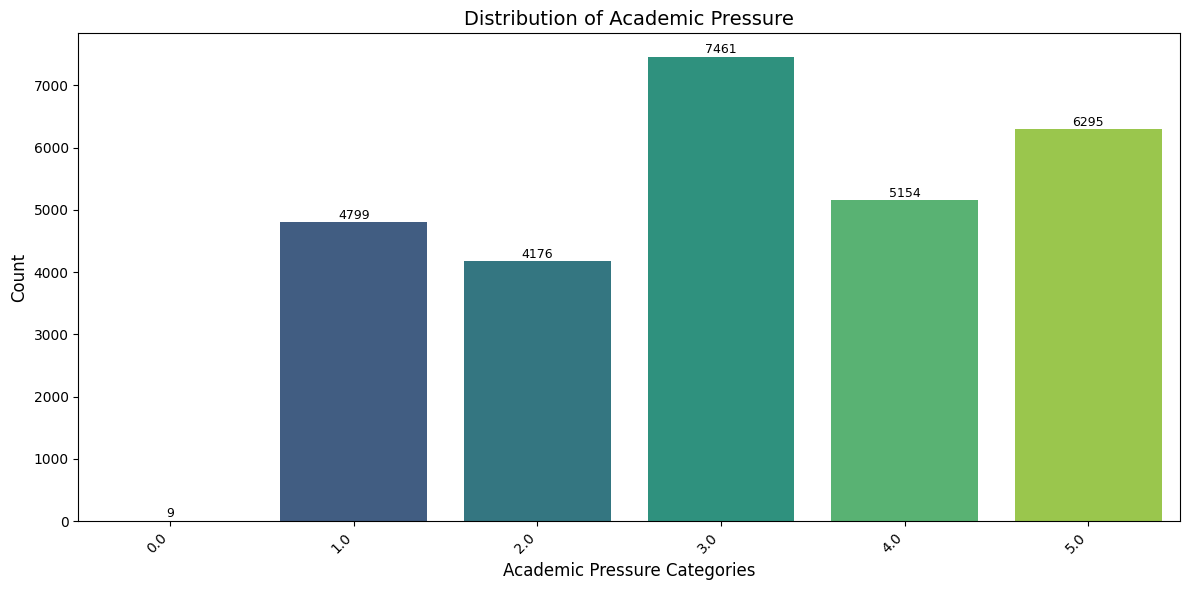

------------------------------


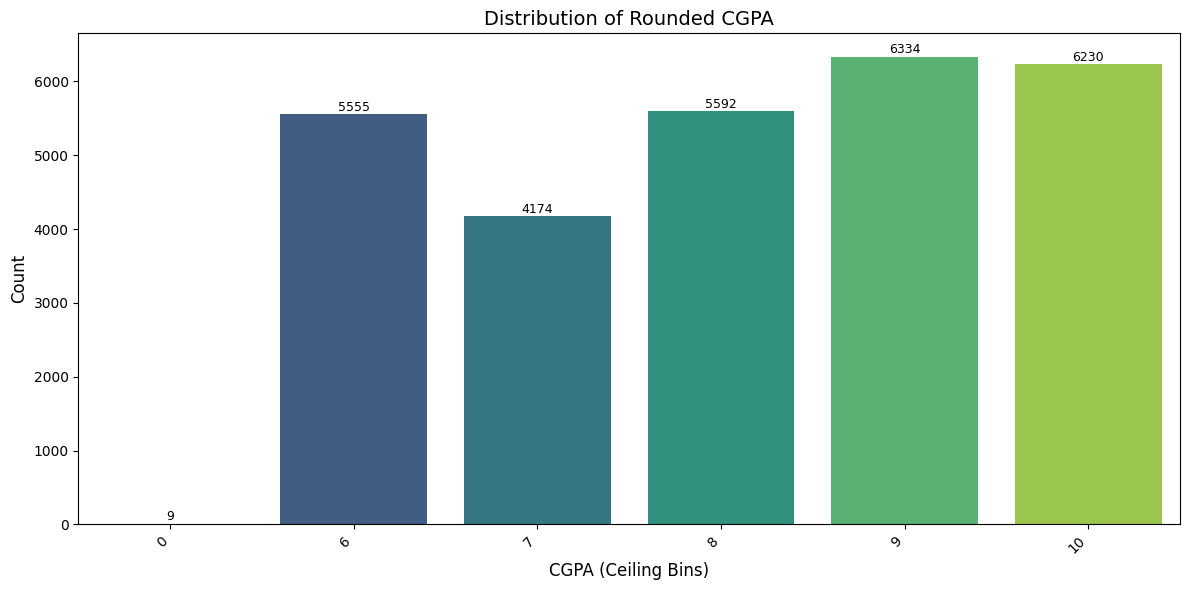

------------------------------


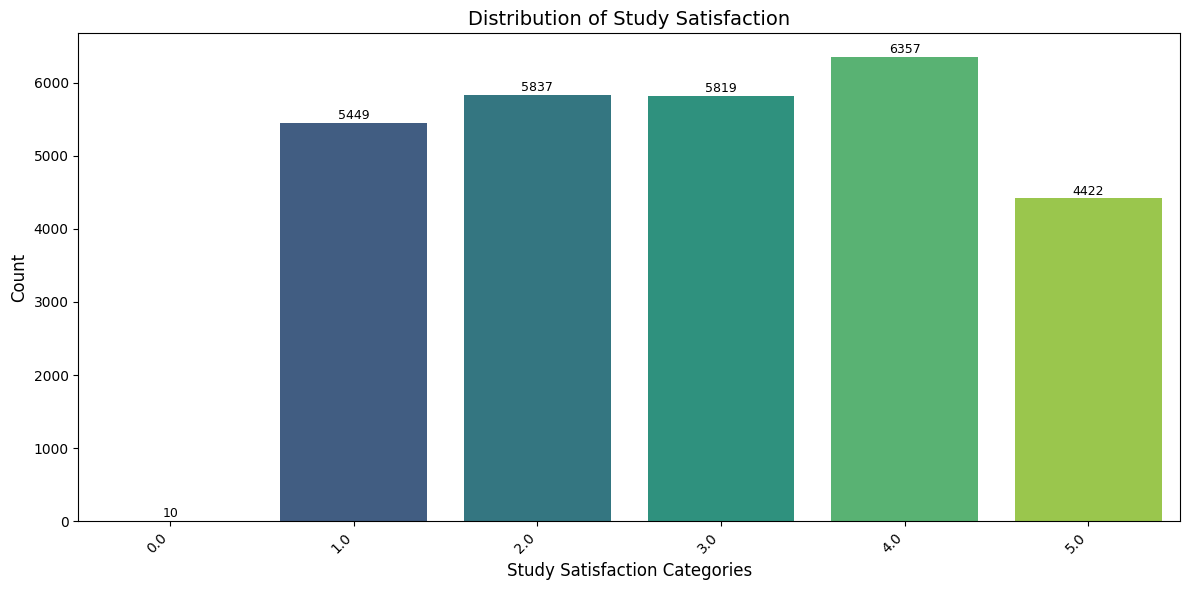

------------------------------


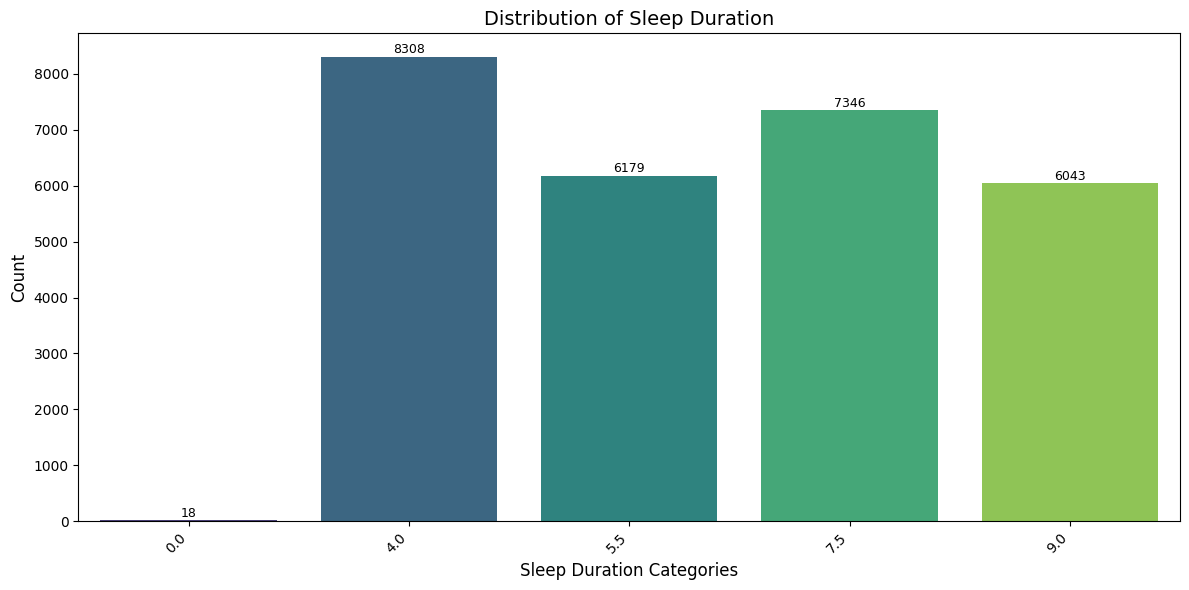

------------------------------


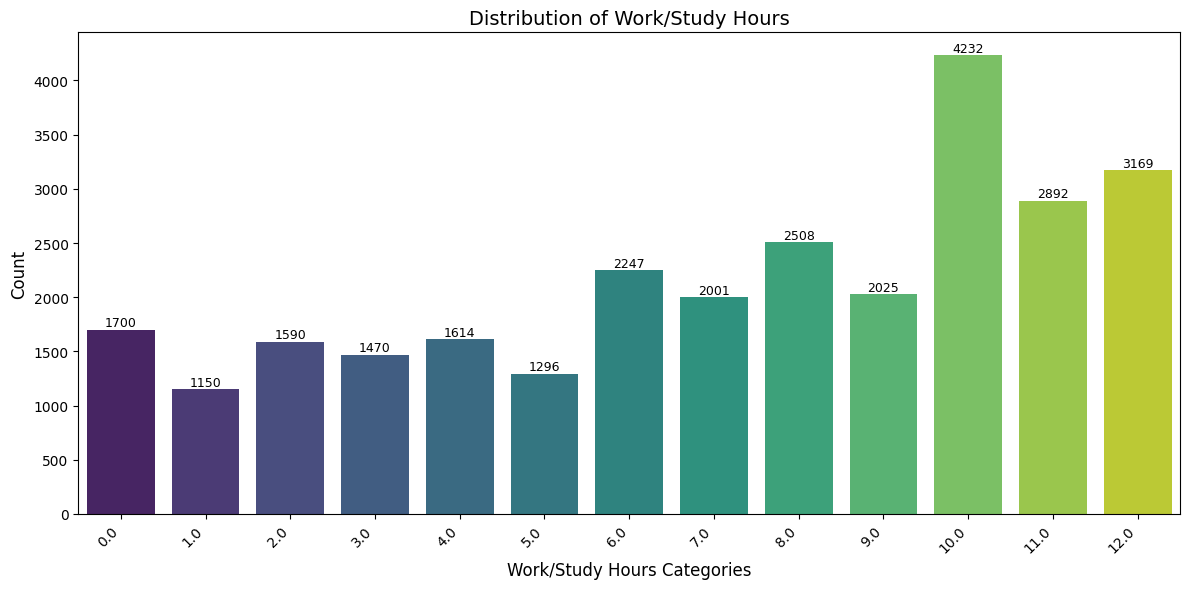

------------------------------


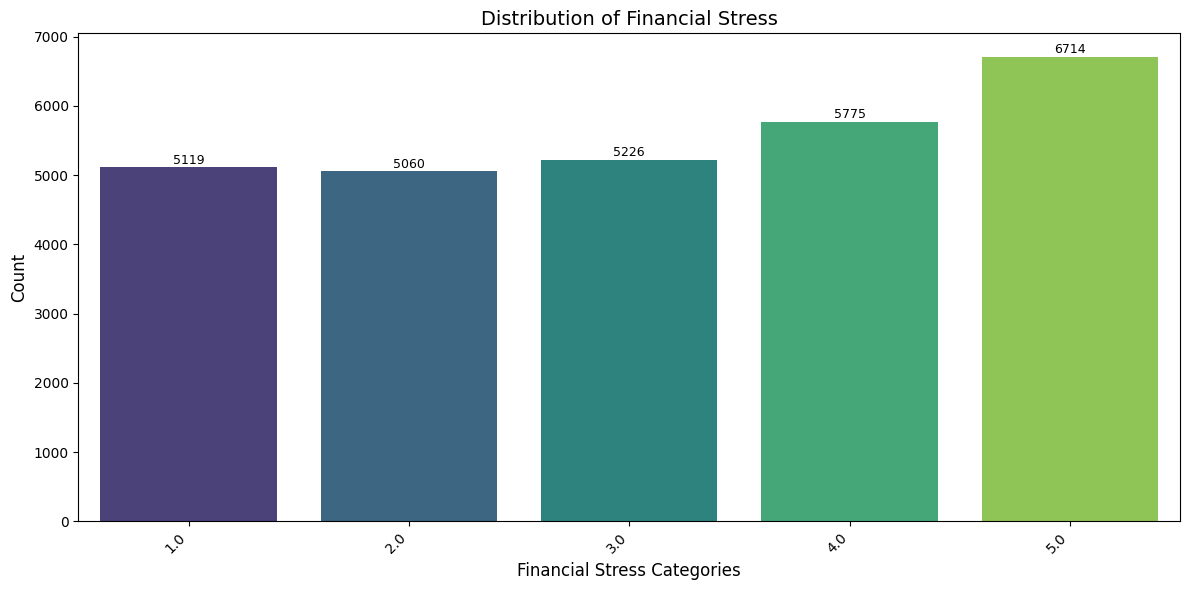

------------------------------


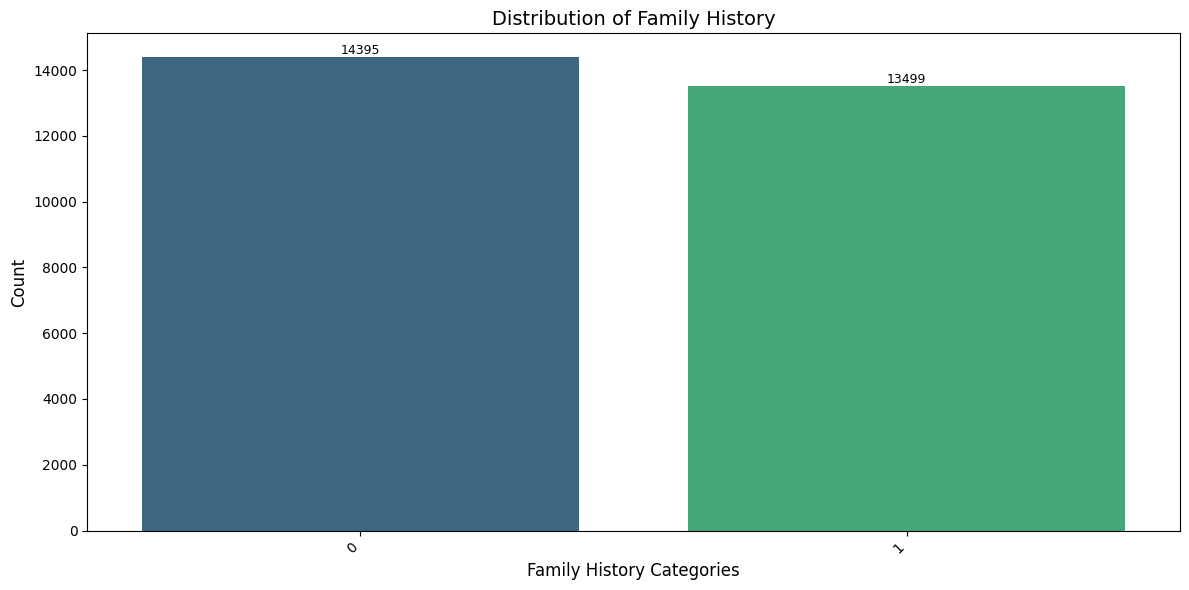

------------------------------


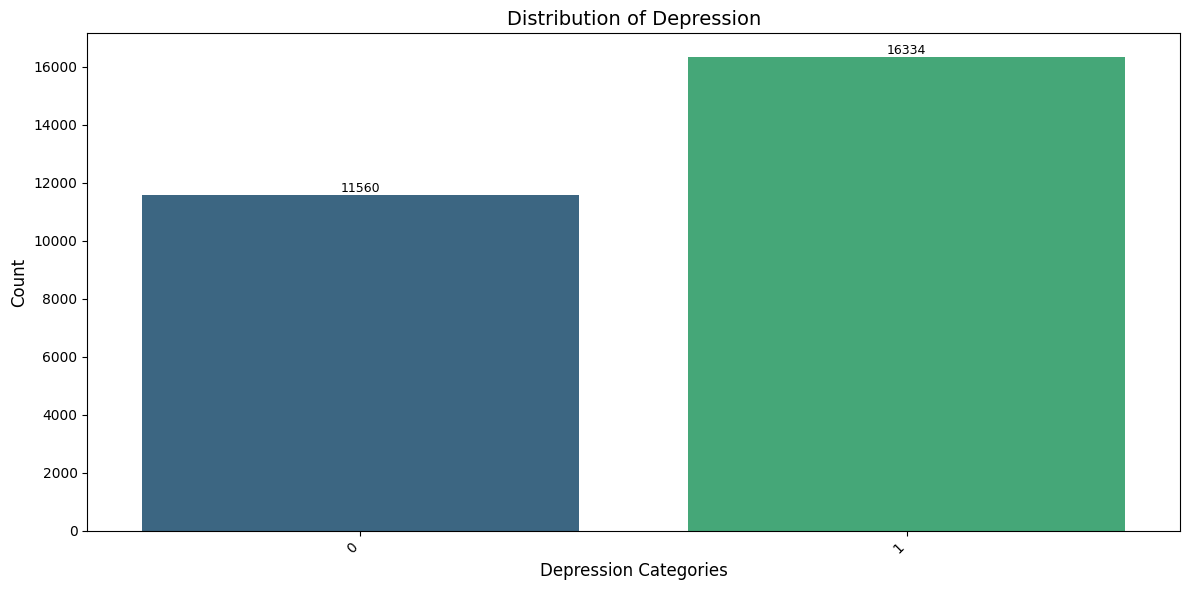

------------------------------


In [ ]:
numerical_features = list(df.columns)

for feature in numerical_features:
    feature_data = df[feature].copy().dropna()
    if feature_data.empty:
        print("-" * 30)
        continue

    plot_counts = pd.Series(dtype=float)
    chart_title = ""
    xlabel_text = ""
    is_cgpa_feature = (feature == 'CGPA')

    if is_cgpa_feature:
        cgpa_data = pd.to_numeric(feature_data, errors='coerce').dropna()
        if cgpa_data.empty:
            print("-" * 30)
            continue

        rounded_cgpa = cgpa_data.apply(np.ceil).astype(int)
        plot_counts = rounded_cgpa.value_counts().sort_index()
        chart_title = f'Distribution of Rounded CGPA'
        xlabel_text = "CGPA (Ceiling Bins)"

    else:
        feature_counts = feature_data.astype(str).value_counts()
        plot_counts = feature_counts
        chart_title = f'Distribution of {feature}'

        if not plot_counts.empty:
            counts_to_sort = plot_counts
            if not counts_to_sort.empty:
                try:
                    sorted_counts = counts_to_sort.sort_index(key=pd.to_numeric)
                except (ValueError, TypeError):
                    sorted_counts = counts_to_sort.sort_index()
                plot_counts = sorted_counts

        xlabel_text = f"{feature} Categories"

    plot_counts = plot_counts[plot_counts > 0]

    if plot_counts.empty:
        print("-" * 30)
        continue

    plot_indices = plot_counts.index.astype(str)
    plot_values = plot_counts.values

    plt.figure(figsize=(12, 6))

    try:
        n_colors = len(plot_counts)
        bar_colors = sns.color_palette("viridis", n_colors=n_colors)
    except Exception as e:
        print(f"Color palette warning for {feature}: {e}")
        bar_colors = None

    ax = sns.barplot(
        x=plot_indices,
        y=plot_values,
        palette=bar_colors,
        order=plot_indices,
        hue=plot_indices,
        legend=False
    )

    plt.title(chart_title, fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(xlabel_text, fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if height > 0:
             ax.annotate(f'{int(height)}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         fontsize=9, color='black',
                         xytext=(0, 5),
                         textcoords='offset points')

    plt.tight_layout()
    plt.show()
    print("-" * 30)

These bar plots of the dataset reveals several key distributions and potential limitations. Critically, the sample contains significantly more students reporting depression (category '1') than not ('0'), which could indicate high prevalence or, more likely, a representation bias possibly driven by self-selection (distressed students being more likely to participate). Other observations include potential gender imbalance (more category '0'), a skew towards higher CGPAs, and a concentration of participants aged 18-34. These factors suggest the sample may not perfectly represent the broader student population. Further limitations include potential measurement bias arising from the use of subjective, categorical self-reports for variables like academic pressure, study satisfaction, financial stress, and sleep duration, making precise interpretation and generalizability challenging.

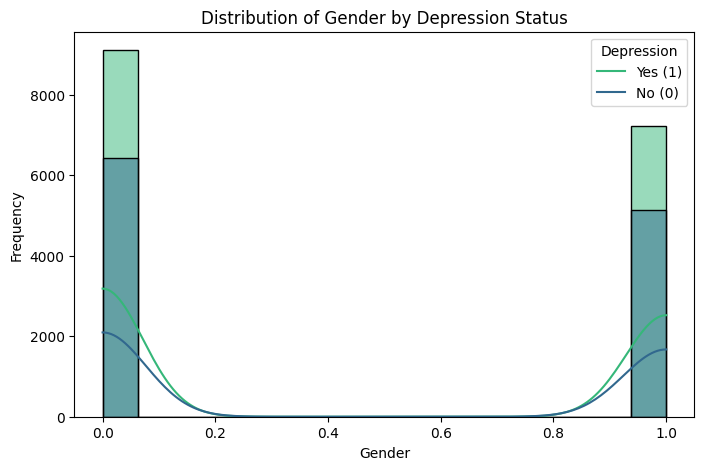

------------------------------


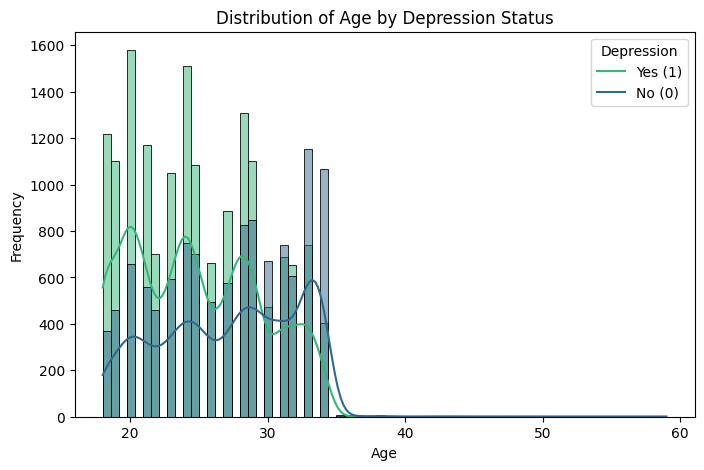

------------------------------


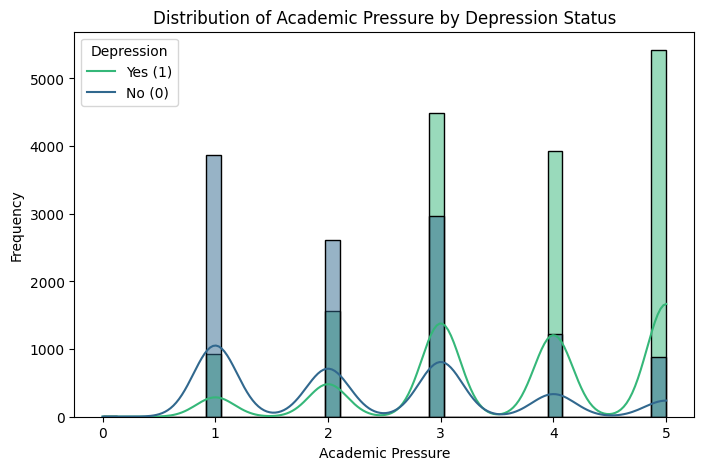

------------------------------


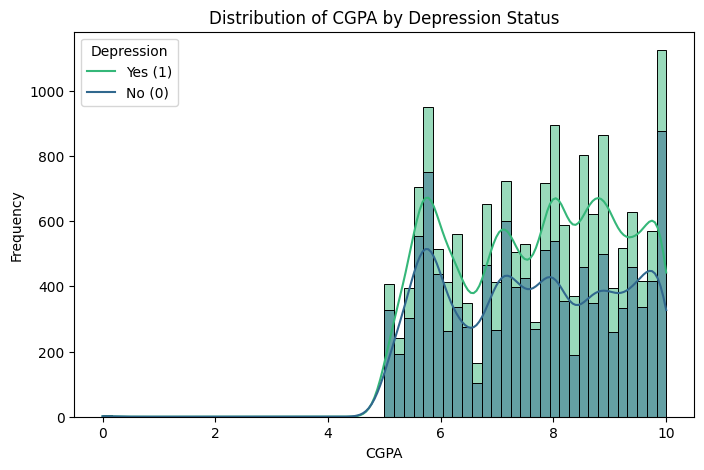

------------------------------


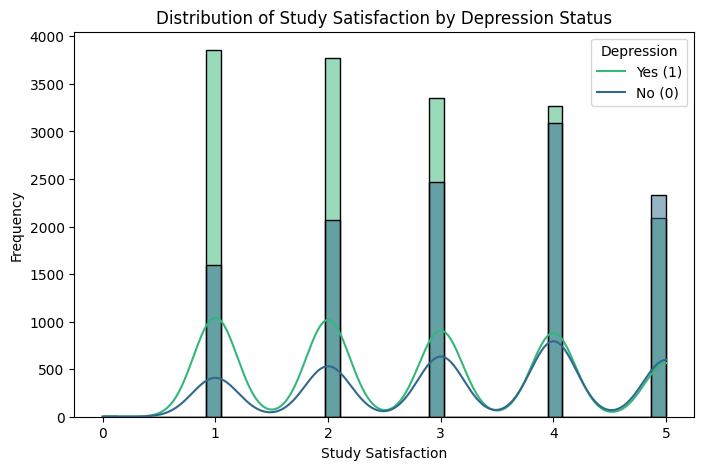

------------------------------


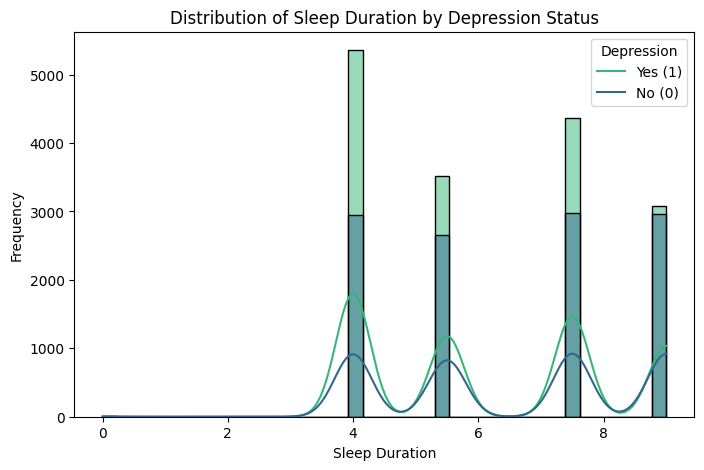

------------------------------


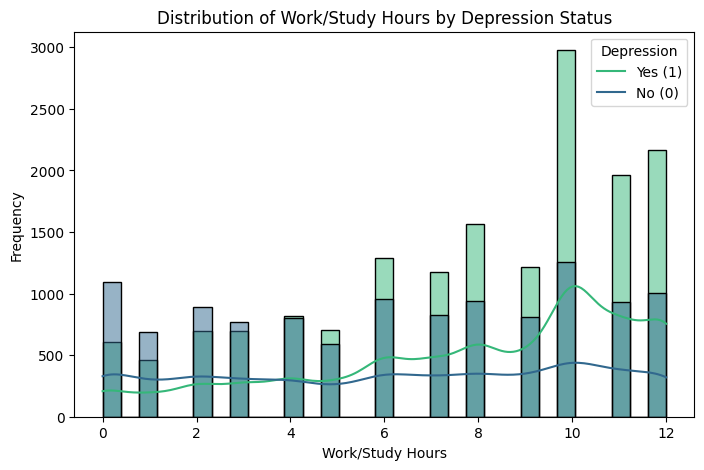

------------------------------


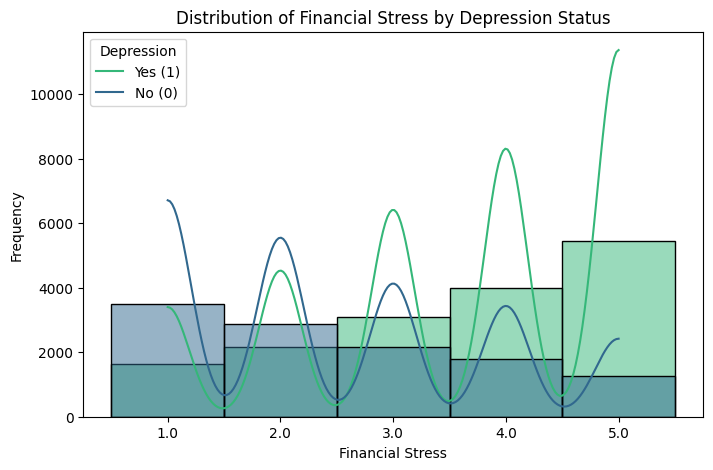

------------------------------


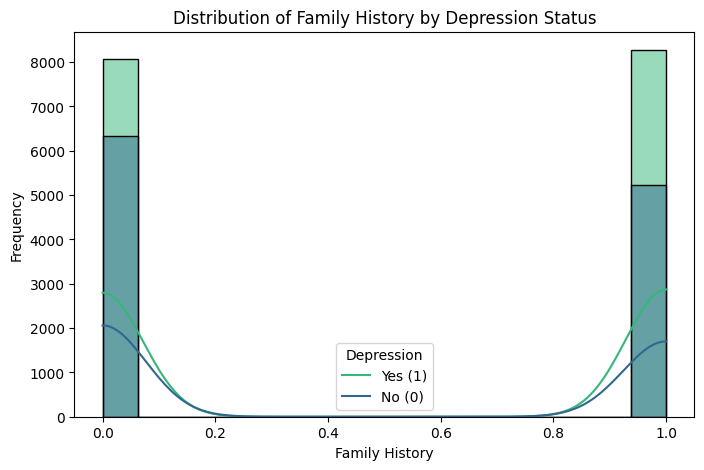

------------------------------


In [ ]:
numerical_features = list(df.columns)[:-1]

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sorted_data = df.sort_values(by=feature)
    sns.histplot(data=sorted_data, x=feature, hue='Depression', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Depression Status')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend(title='Depression', labels=['Yes (1)', 'No (0)'])
    plt.show()
    print("-" * 30)

These histograms reveal several insights. To start off, the two genders expressed in this dataset display near-equal depression rates, supporting the idea that gender has low-impact on depression. The distribution of age by depression status exhibits lower rates of depression at higher ages. Lower academic pressure, work/study hours, and financial stress result in lower depression rates. Higher study satisfaction and sleep duration demonstrate decreased depression rates. Family history and CGPA appears to have low-impact on depression rates.

After exploring the dataset, gender, family history, and CGPA will be excluded due to their low-impact.

In [ ]:
df = df[['Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Depression']]

# K-Nearest Neighbors Model

Now that the data has been explored and prepared, we will build a simple K-Nearest Neighbors (KNN) classification model to predict whether a student might be experiencing depression based on the selected features.

## Data Splitting and Scaling

The features (X) from the target variable (y, which is 'Depression') are separated. Then, the data into training and testing sets are split to evaluate the model's performance on unseen data. KNN is sensitive to the scale of features, so StandardScaler is used to scale the features.

In [ ]:
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: X={X_train_scaled.shape}, y={y_train.shape}")
print(f"Testing set shape: X={X_test_scaled.shape}, y={y_test.shape}")

Training set shape: X=(22315, 6), y=(22315,)
Testing set shape: X=(5579, 6), y=(5579,)


## Training and Prediction

We instantiate the KNN classifier with k=5 (a common starting point) and train it using the scaled training data. Then, we make predictions on the scaled test data.

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Predictions made on the test set.")

Predictions made on the test set.


## Evaluation

We evaluate the model using standard classification metrics like accuracy, precision, recall, F1-score, and the confusion matrix.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Depressed (0)', 'Depressed (1)']))

KNN Model Accuracy: 0.7643

Classification Report:
                   precision    recall  f1-score   support

Not Depressed (0)       0.73      0.69      0.71      2312
    Depressed (1)       0.79      0.82      0.80      3267

         accuracy                           0.76      5579
        macro avg       0.76      0.75      0.76      5579
     weighted avg       0.76      0.76      0.76      5579



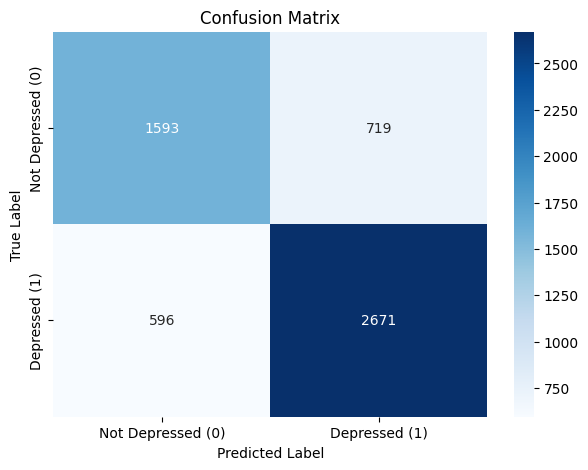

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed (0)', 'Depressed (1)'],
            yticklabels=['Not Depressed (0)', 'Depressed (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Summary

This KNN Model provides achieves accuracies around 70-80%. Although it doesn't show reliably high results, it creates a solid baseline for a model that can predict student depression.

After consistent optimizing, around 50-nearest neighbors was optimal for high-accuracies. However it is important to note that this model can be much more highly-optimized through the removal of outliers and increased precision of the number of neighbors considered.

Viewing the confusion matrix, the representation bias identified in the bar plots above show a clear impact. The accuracy of depressed predictions are higher than the accuracy of not depressed predictions.